In [1]:
import numpy as np

In [6]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

In [21]:
def gradient_descent(x, y):
  if (len(x) != len(y)):
    return "Invalid Lists: Lengths"

  m_curr = b_curr = 0
  iterations = 10000
  learning_rate = 0.06
  n = len(x)

  for i in range(iterations):
    y_predicted = m_curr * x + b_curr

    # mse = (1/n) * sum [(y-y_pred)^2] for y in range[y.1 to y.n]
    cost = (1/n) * sum([val**2 for val in (y-y_predicted)]) # cost = (sum of square of errors)/count of points # aim for minimum squared error (mse)

    # derivates of cost function
    md = -(2/n)*sum(x*(y-y_predicted)) # m derivative
    bd = -(2/n)*sum(y-y_predicted) # b derivative

    # update the values based on learning rate
    m_curr = m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd

    # print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
  return (m_curr, b_curr)

In [22]:
m, b = gradient_descent(x, y)

In [24]:
print("Derived equation is y = {}x + {} \n".format(m, b))

Derived equation is y = 2.0000000000000036x + 2.999999999999987 



In [25]:
y_predicted = m * x + b

In [26]:
print(x, y, y_predicted)

[1 2 3 4 5] [ 5  7  9 11 13] [ 5.  7.  9. 11. 13.]


# Gradient Descent Assigment

In [27]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/3_gradient_descent/Exercise/test_scores.csv"

In [29]:
import pandas as pd
from sklearn import linear_model
import math
import numpy as np

In [69]:
scores_df = pd.read_csv(url)

In [86]:
import math

def gradient_descent_2(x, y, learning_rate=0.0001, max_iterations=1000, tolerance=1e-20):
    if len(x) != len(y):
        return "Invalid Lists: Lengths"

    m_curr = b_curr = 0
    n = len(x)
    iterations = 0
    cost_previous = 0

    for i in range(max_iterations):
        iterations = i+1
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * np.sum((y - y_predicted)**2)
        md = -(2/n) * np.sum(x * (y - y_predicted))
        bd = -(2/n) * np.sum(y - y_predicted)
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd

        if math.isclose(cost, cost_previous, rel_tol=1e-20):
          break
        cost_previous = cost

        if iterations % 10000 == 0:
          print(f"Iteration {iterations}: m = {m_curr}, b = {b_curr}, cost = {cost}")

    return m_curr, b_curr, iterations, cost


In [87]:
x = scores_df.math
y = scores_df.cs

m, b, iterations, cost = gradient_descent_2(x, y, learning_rate=0.0002, max_iterations=1000000)

print(m, b, iterations, cost)

Iteration 10000: m = 1.0390524972633637, b = 0.4045913382155772, cost = 31.735517659560408
Iteration 20000: m = 1.0346798214689126, b = 0.714471521495244, cost = 31.687282831347957
Iteration 30000: m = 1.0312041273277062, b = 0.9607849433290272, cost = 31.656807440585382
Iteration 40000: m = 1.0284414139844151, b = 1.1565712667181256, cost = 31.637552692998465
Iteration 50000: m = 1.026245425296369, b = 1.3121952848525957, cost = 31.62538729346261
Iteration 60000: m = 1.0244999071340382, b = 1.435895626128131, cost = 31.617701036076063
Iteration 70000: m = 1.0231124529674438, b = 1.53422090146233, cost = 31.612844758858177
Iteration 80000: m = 1.0220096119280626, b = 1.61237638324884, cost = 31.609776499856295
Iteration 90000: m = 1.021133000370416, b = 1.6744995688948696, cost = 31.607837933979564
Iteration 100000: m = 1.0204362110820604, b = 1.72387921708579, cost = 31.606613122887644
Iteration 110000: m = 1.0198823565177075, b = 1.7631294524061765, cost = 31.60583927133638
Iteration

In [88]:
reg = linear_model.LinearRegression()
reg.fit(scores_df[['math']], scores_df.cs)

LinearRegression()

In [90]:
print(f"Using Grad Desc: m={m} and b={b}")
print(f"Using Linear Reg: coef={reg.coef_} and intercept={reg.intercept_}")

Using Grad Desc: m=1.0177383551711265 and b=1.9150692625959145
Using Linear Reg: coef=[1.01773624] and intercept=1.9152193111569034


In [91]:
scores_df['cs_pred_grad_desc'] = m * scores_df['math'] + b

scores_df

,name,math,cs,cs_pred_grad_desc
0,david,92,98,95.546998
1,laura,56,68,58.908417
2,sanjay,88,81,91.476045
3,wei,70,80,73.156754
4,jeff,80,83,83.334138
5,aamir,49,52,51.784249
6,venkat,65,66,68.068062
7,virat,35,30,37.535912
8,arthur,66,68,69.085801
9,paul,67,73,70.103539


In [97]:
math_df = scores_df['math']

scores_df['cs_pred_lin_reg'] = reg.predict(math_df.values.reshape(-1, 1))

scores_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,name,math,cs,cs_pred_grad_desc,cs_pred_lin_reg
0,david,92,98,95.546998,95.546953
1,laura,56,68,58.908417,58.908449
2,sanjay,88,81,91.476045,91.476008
3,wei,70,80,73.156754,73.156756
4,jeff,80,83,83.334138,83.334118
5,aamir,49,52,51.784249,51.784295
6,venkat,65,66,68.068062,68.068075
7,virat,35,30,37.535912,37.535988
8,arthur,66,68,69.085801,69.085811
9,paul,67,73,70.103539,70.103547


In [98]:
import matplotlib.pyplot as plt

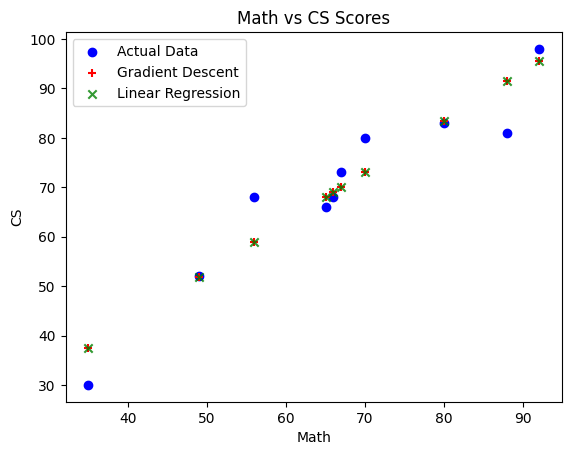

In [109]:
import matplotlib.pyplot as plt

plt.title('Math vs CS Scores')
plt.xlabel('Math')
plt.ylabel('CS')

# Use plt.scatter() for scatter plots
plt.scatter(scores_df['math'], scores_df['cs'], color='blue', marker='o', label='Actual Data')  # Example: blue circles for actual data
plt.scatter(scores_df['math'], scores_df['cs_pred_grad_desc'], color='red', marker='+', label='Gradient Descent')  # Example: red x's for gradient descent predictions
plt.scatter(scores_df['math'], scores_df['cs_pred_lin_reg'], color='green', marker='x', label='Linear Regression', alpha=0.8)  # Example: green squares for linear regression predictions

plt.legend()  # Add a legend to identify the data points
plt.show()  # Display the plot

# Saving the models using Pickle & Joblib

In [110]:
import pickle

In [111]:
with open('model_pickle', 'wb') as f:
  pickle.dump(reg, f)

In [112]:
with open('model_pickle', 'rb') as f:
  mp = pickle.load(f)

In [113]:
scores_df['cs_lin_reg_pickle'] = mp.predict(math_df.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [114]:
scores_df

,name,math,cs,cs_pred_grad_desc,cs_pred_lin_reg,cs_lin_reg_pickle
0,david,92,98,95.546998,95.546953,95.546953
1,laura,56,68,58.908417,58.908449,58.908449
2,sanjay,88,81,91.476045,91.476008,91.476008
3,wei,70,80,73.156754,73.156756,73.156756
4,jeff,80,83,83.334138,83.334118,83.334118
5,aamir,49,52,51.784249,51.784295,51.784295
6,venkat,65,66,68.068062,68.068075,68.068075
7,virat,35,30,37.535912,37.535988,37.535988
8,arthur,66,68,69.085801,69.085811,69.085811
9,paul,67,73,70.103539,70.103547,70.103547


We can see that the saved model from file gives the same prediction as the earlier generated one

In [116]:
import joblib

In [117]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [118]:
mjb = joblib.load('model_joblib')

In [119]:
scores_df['cs_lin_reg_joblib'] = mjb.predict(math_df.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [120]:
scores_df

,name,math,cs,cs_pred_grad_desc,cs_pred_lin_reg,cs_lin_reg_pickle,cs_lin_reg_joblib
0,david,92,98,95.546998,95.546953,95.546953,95.546953
1,laura,56,68,58.908417,58.908449,58.908449,58.908449
2,sanjay,88,81,91.476045,91.476008,91.476008,91.476008
3,wei,70,80,73.156754,73.156756,73.156756,73.156756
4,jeff,80,83,83.334138,83.334118,83.334118,83.334118
5,aamir,49,52,51.784249,51.784295,51.784295,51.784295
6,venkat,65,66,68.068062,68.068075,68.068075,68.068075
7,virat,35,30,37.535912,37.535988,37.535988,37.535988
8,arthur,66,68,69.085801,69.085811,69.085811,69.085811
9,paul,67,73,70.103539,70.103547,70.103547,70.103547
